In [55]:
import pandas as pd
import math
import random
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [17]:
random.seed(98103)
n = 30
x = np.sort(np.array([random.random() for i in range(n)]))

In [18]:
x

array([ 0.03957894,  0.0415681 ,  0.07243195,  0.15028904,  0.16133414,
        0.19195631,  0.23283392,  0.25990098,  0.38014581,  0.43244472,
        0.47056698,  0.4714946 ,  0.4787064 ,  0.49053554,  0.54678006,
        0.56968036,  0.60793245,  0.62023754,  0.63009313,  0.64500967,
        0.6467576 ,  0.69908978,  0.79024505,  0.81038465,  0.82932089,
        0.85011156,  0.88636844,  0.89114108,  0.90438848,  0.92448587])

In [23]:
f = lambda i: math.sin(4*i)
y = np.array([f(i) for i in x])

In [24]:
y

array([ 0.15765527,  0.16550732,  0.28569137,  0.56559633,  0.60146736,
        0.69457232,  0.80241773,  0.86220366,  0.99873959,  0.98738887,
        0.95188361,  0.95073995,  0.9414033 ,  0.92439655,  0.81600889,
        0.75971273,  0.65172975,  0.6136243 ,  0.58202776,  0.53250217,
        0.52657119,  0.33841644, -0.01938632, -0.09977964, -0.17478847,
       -0.25597249, -0.39299012, -0.41047204, -0.45819309, -0.52809088])

In [25]:
random.seed(1)
e = np.array([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

In [26]:
y

array([ 0.58705019,  0.64865585,  0.30780331,  0.31074845,  0.23740963,
        0.70501716,  0.46171668,  0.38326051,  1.06517691,  1.03184707,
        1.13403971,  0.64608297,  0.94307173,  0.90281597,  0.31406589,
        0.93904512,  0.75863345,  1.40999498,  0.64968415,  0.48426807,
        0.93749025,  0.40468019,  0.28362402, -0.22162773, -0.10206453,
        0.08545707, -0.16090778, -0.36764796, -0.81896243, -0.37968362])

In [27]:
data = pd.DataFrame({'X1': x, 'Y': y})

In [29]:
data.head()

,X1,Y
0,0.039579,0.587050
1,0.041568,0.648656
2,0.072432,0.307803
3,0.150289,0.310748
4,0.161334,0.237410


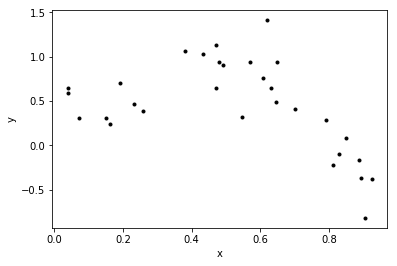

In [30]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

### Define some useful polynomial regression functions

In [31]:
def polynomial_features(data, deg):
    data_copy = data.copy()
    for i in range(1, deg):
        data_copy['X' + str(i + 1)] = data_copy['X' + str(i)] * data['X1']
    return data_copy

In [45]:
def polynomial_regression(data, deg):
    model = LinearRegression()
    data_poly = polynomial_features(data, deg)
    y = data_poly['Y']
    X = data_poly.drop('Y', axis=1)
    model.fit(X, y)
    return model

In [46]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coef_)
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = pd.DataFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

In [47]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coef_)

    # Get learned parameters as a list
    w = [model.intercept_] + list(model.coef_)

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print('Learned polynomial for degree ' + str(deg) + ':')
    w.reverse()
    print(np.poly1d(w))

### Fit a degree-2 polynomial

In [48]:
model = polynomial_regression(data, deg=2)

In [49]:
print_coefficients(model)

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


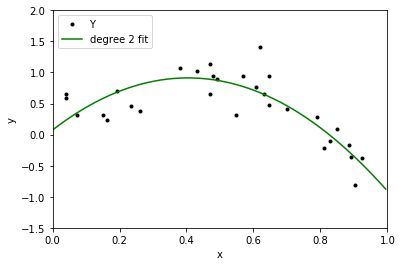

In [50]:
plot_poly_predictions(data,model)

### Fit a degree-4 polynomial

Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


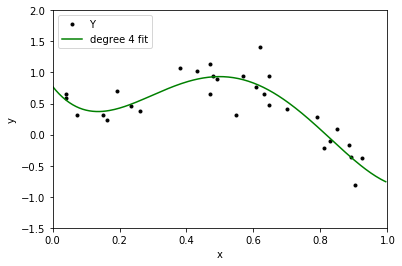

In [51]:
model = polynomial_regression(data, deg=4)
print_coefficients(model)
plot_poly_predictions(data,model)

### Fit a degree-16 polynomial

In [53]:
model = polynomial_regression(data, deg=16)
print_coefficients(model)

Learned polynomial for degree 16:
           16             15            14             13
3.337e+08 x  - 2.226e+09 x  + 6.62e+09 x  - 1.156e+10 x 
              12         11             10             9             8
 + 1.309e+10 x  - 1e+10 x  + 5.141e+09 x  - 1.657e+09 x + 2.259e+08 x
              7             6             5             4             3
 + 6.689e+07 x - 4.733e+07 x + 1.393e+07 x - 2.547e+06 x + 3.018e+05 x
              2
 - 2.188e+04 x + 839.3 x - 12.01


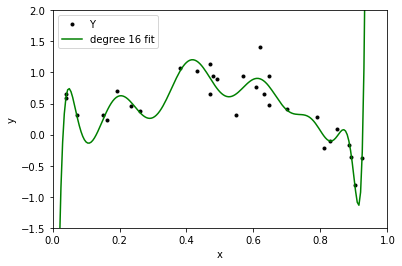

In [54]:
plot_poly_predictions(data,model)

### Ridge Regression

In [58]:
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = Ridge(alpha=l2_penalty)
    data_poly = polynomial_features(data, deg)
    y = data_poly['Y']
    X = data_poly.drop('Y', axis=1)
    model.fit(X, y)
    return model

### Perform a ridge fit of a degree-16 polynomial using a very small penalty strength

In [59]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=1e-25)
print_coefficients(model)

Learned polynomial for degree 16:
           16             15             14             13
3.214e+08 x  - 2.129e+09 x  + 6.275e+09 x  - 1.082e+10 x 
              12             11             10             9
 + 1.201e+10 x  - 8.891e+09 x  + 4.299e+09 x  - 1.183e+09 x
              8           7             6             5             4
 + 2.575e+07 x + 1.3e+08 x - 6.202e+07 x + 1.641e+07 x - 2.843e+06 x
              3             2
 + 3.255e+05 x - 2.308e+04 x + 873.5 x - 12.41


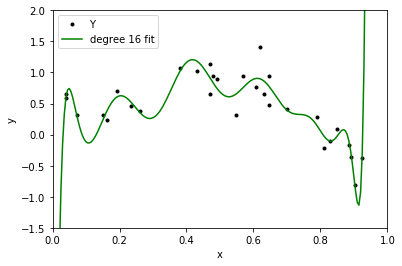

In [60]:
plot_poly_predictions(data,model)

### Perform a ridge fit of a degree-16 polynomial using a very large penalty strength

In [63]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=10)
print_coefficients(model)

Learned polynomial for degree 16:
          16           15           14           13           12
-0.03822 x  - 0.04265 x  - 0.04763 x  - 0.05321 x  - 0.05946 x 
            11           10           9           8          7
 - 0.06643 x  - 0.07416 x  - 0.08262 x - 0.09173 x - 0.1012 x
           6          5          4          3           2
 - 0.1103 x - 0.1179 x - 0.1214 x - 0.1158 x - 0.09251 x - 0.0412 x + 0.6399


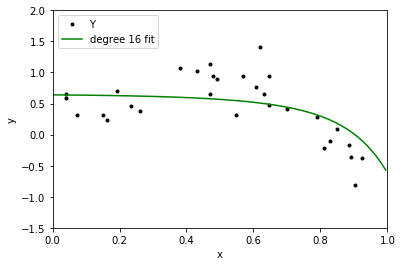

In [64]:
plot_poly_predictions(data,model)

### Let's look at fits for a sequence of increasing lambda values

lambda = 1.00e-25
Learned polynomial for degree 16:
           16             15             14             13
3.214e+08 x  - 2.129e+09 x  + 6.275e+09 x  - 1.082e+10 x 
              12             11             10             9
 + 1.201e+10 x  - 8.891e+09 x  + 4.299e+09 x  - 1.183e+09 x
              8           7             6             5             4
 + 2.575e+07 x + 1.3e+08 x - 6.202e+07 x + 1.641e+07 x - 2.843e+06 x
              3             2
 + 3.255e+05 x - 2.308e+04 x + 873.5 x - 12.41


lambda = 1.00e-10
Learned polynomial for degree 16:
      16        15        14         13        12        11         10
7567 x  - 7803 x  - 6900 x  + 714.4 x  + 6541 x  + 5802 x  - 498.1 x 
         9        8        7        6        5         4         3
 - 6056 x - 4252 x + 3439 x + 4893 x - 4281 x + 769.9 x + 100.6 x
          2
 - 11.39 x - 4.716 x + 0.7859


lambda = 1.00e-06
Learned polynomial for degree 16:
        16         15         14         13         12         11
-11.

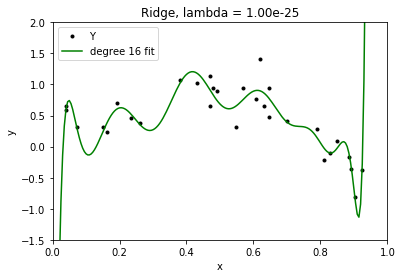

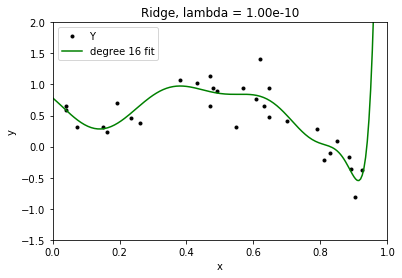

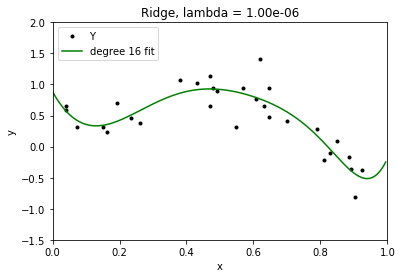

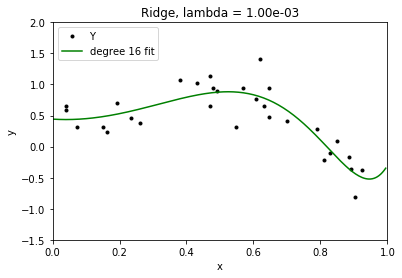

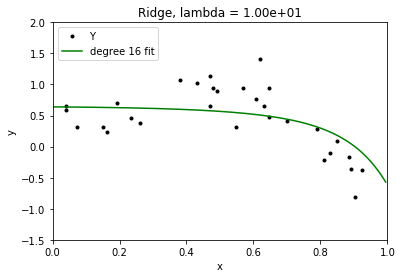

In [66]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e1]:
    model = polynomial_ridge_regression(data, deg=16, l2_penalty=l2_penalty)
    print('lambda = %.2e' % l2_penalty)
    print_coefficients(model)
    print('\n')
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)